In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']]

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [7]:
data['Cabin'] = pd.factorize(data.Cabin)[0]#数值化

In [8]:
data.fillna(0,inplace=True)

In [9]:
data['Sex'] = [1 if x == 'male' else 0 for x in data.Sex]

In [10]:
data['p1'] = np.array(data['Pclass'] == 1).astype(np.int32)
data['p2'] = np.array(data['Pclass'] == 2).astype(np.int32)
data['p3'] = np.array(data['Pclass'] == 3).astype(np.int32)

In [11]:
del data['Pclass']

In [12]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,p1,p2,p3
0,0,1,22.0,1,0,7.2500,-1,S,0,0,1
1,1,0,38.0,1,0,71.2833,0,C,1,0,0
2,1,0,26.0,0,0,7.9250,-1,S,0,0,1
3,1,0,35.0,1,0,53.1000,1,S,1,0,0
4,0,1,35.0,0,0,8.0500,-1,S,0,0,1


In [13]:
data.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [14]:
data['e1'] = np.array(data['Embarked'] == 'S').astype(np.int32)
data['e2'] = np.array(data['Embarked'] == 'C').astype(np.int32)
data['e3'] = np.array(data['Embarked'] == 'Q').astype(np.int32)

In [15]:
del data['Embarked']

In [16]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,p1,p2,p3,e1,e2,e3
0,0,1,22.0,1,0,7.2500,-1,0,0,1,1,0,0
1,1,0,38.0,1,0,71.2833,0,1,0,0,0,1,0
2,1,0,26.0,0,0,7.9250,-1,0,0,1,1,0,0
3,1,0,35.0,1,0,53.1000,1,1,0,0,1,0,0
4,0,1,35.0,0,0,8.0500,-1,0,0,1,1,0,0


In [17]:
data.values.dtype 

dtype('float64')

In [18]:
data_train = data[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'p1', 'p2','p3', 'e1', 'e2', 'e3']]

In [19]:
data_target = data['Survived'].values.reshape(len(data),1)

In [20]:
np.shape(data_train),np.shape(data_target)

((891, 12), (891, 1))

In [102]:
import tensorflow as tf

In [103]:
x = tf.placeholder(dtype='float',shape=[None,12])
y = tf.placeholder(dtype='float',shape=[None,1])

In [104]:
weight = tf.Variable(tf.random_normal([12,1]))
bias = tf.Variable(tf.random_normal([1]))
output = tf.matmul(x,weight) + bias
pred = tf.cast(tf.sigmoid(output) > 0.5,tf.float32)

In [105]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output))

In [106]:
train_step = tf.train.GradientDescentOptimizer(0.0003).minimize(loss)

In [107]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,y),tf.float32))

In [108]:
data_test = pd.read_csv('test.csv')
data_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']]
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())
data_test['Cabin'] = pd.factorize(data_test.Cabin)[0]#数值化
data_test.fillna(0,inplace = True)
data_test['Sex'] = [1 if x == 'male' else 0 for x in data_test.Sex]
data_test['p1'] = np.array(data_test['Pclass'] == 1).astype(np.int32)
data_test['p2'] = np.array(data_test['Pclass'] == 2).astype(np.int32)
data_test['p3'] = np.array(data_test['Pclass'] == 3).astype(np.int32)
data_test['e1'] = np.array(data_test['Embarked'] == 'S').astype(np.int32)
data_test['e2'] = np.array(data_test['Embarked'] == 'C').astype(np.int32)
data_test['e3'] = np.array(data_test['Embarked'] == 'Q').astype(np.int32)
del data_test['Pclass']
del data_test['Embarked']


In [109]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss_train = []
train_acc = []

In [110]:
for i in range(25000):
    #index = np.random.permutation(len(data_target))#打乱数据顺序，防止过拟合
    #data_train = data_train[index]
    #data_target = data_target[index]
    for n in range(len(data_target)//100 + 1):
        batch_xs = data_train[n*100:n*100+100]
        batch_ys = data_target[n*100:n*100+100]
        sess.run(train_step,feed_dict={x: batch_xs,y: batch_ys})
    if i % 5000 ==0:
        loss_temp = sess.run(loss,feed_dict={x: batch_xs,y: batch_ys})
        loss_train.append(loss_temp)
        train_acc_temp = sess.run(accuracy,feed_dict={x: batch_xs,y: batch_ys})
        train_acc.append(train_acc_temp)
        print(loss_temp,train_acc_temp)

18.6079 0.296703
0.459463 0.802198
0.437061 0.791209
0.427318 0.813187
0.421868 0.813187


In [111]:
import matplotlib.pyplot as plt

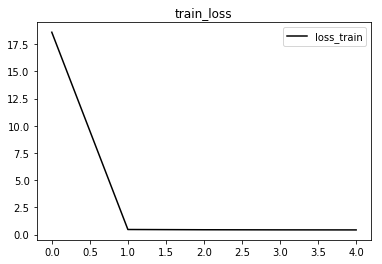

In [112]:
plt.plot(loss_train,'k-',label = 'loss_train')
plt.title('train_loss')
plt.legend()
plt.show()

In [113]:
predictions = sess.run(pred,feed_dict={x:data_test})
data_test = pd.read_csv('test.csv')

In [114]:
predictions = predictions.flatten()

In [115]:
submission = pd.DataFrame({
    "PassengerId": data_test["PassengerId"],"Survived": predictions
})
submission.to_csv("titanic-submission.csv", index=False)